In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/winequality-red.csv')

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1040,7.4,0.965,0.00,2.2,0.088,16.0,32.0,0.99756,3.58,0.67,10.2,5
275,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,6
1384,7.1,0.755,0.15,1.8,0.107,20.0,84.0,0.99593,3.19,0.50,9.5,5
1279,9.8,0.300,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5,7
129,6.1,0.380,0.15,1.8,0.072,6.0,19.0,0.99550,3.42,0.57,9.4,5
1094,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6
1185,7.0,0.430,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9,6
904,6.8,0.590,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,7
1068,11.1,0.310,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
1523,6.8,0.480,0.25,2.0,0.076,29.0,61.0,0.99530,3.34,0.60,10.4,5


In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.duplicated().sum()

240

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [19]:
df1=pd.read_csv('/content/winequality-red.csv')

In [20]:
X=df1.drop(columns='quality',axis=1)
Y=df1['quality']

Feature Selection

In [18]:
from sklearn.feature_selection import mutual_info_classif

In [21]:
mut=mutual_info_classif(X,Y)

In [24]:
m=pd.Series(mut)
m.sort_values(ascending=False)

10    0.175545
1     0.110386
9     0.109941
7     0.072804
6     0.061642
2     0.050873
0     0.037989
3     0.034853
8     0.030979
4     0.029758
5     0.025090
dtype: float64

In [31]:
ddf=df.drop(columns=df.iloc[:,[4,5,8,3,0,2]],axis=1)

In [32]:
ddf.shape

(1359, 6)

<Axes: >

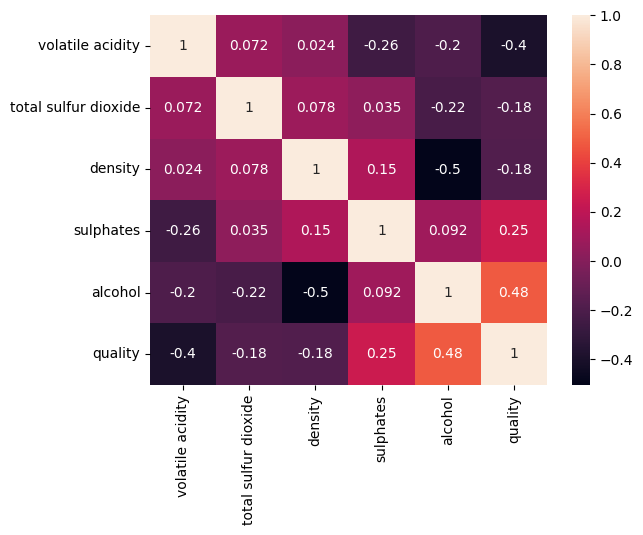

In [33]:
sns.heatmap(ddf.corr(),annot=True)

In [34]:
X=ddf.drop(columns='quality',axis=1)
y=ddf['quality']

In [36]:
ddf.columns

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

Within Clusters Sum of Sqaures

Elbow Method

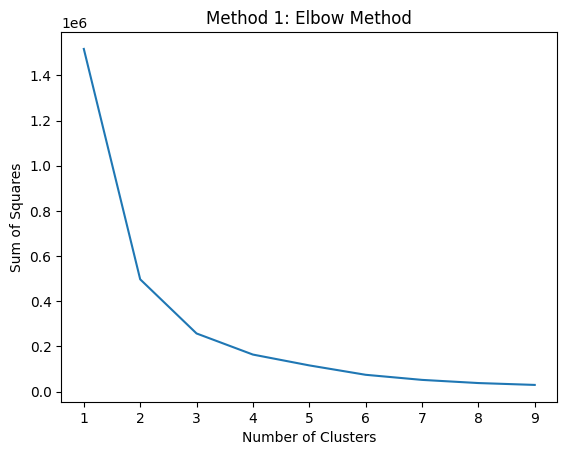

In [43]:
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Method 1: Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares')
plt.show()

 K Elbow visualizer

In [44]:
pip install yellowbrick

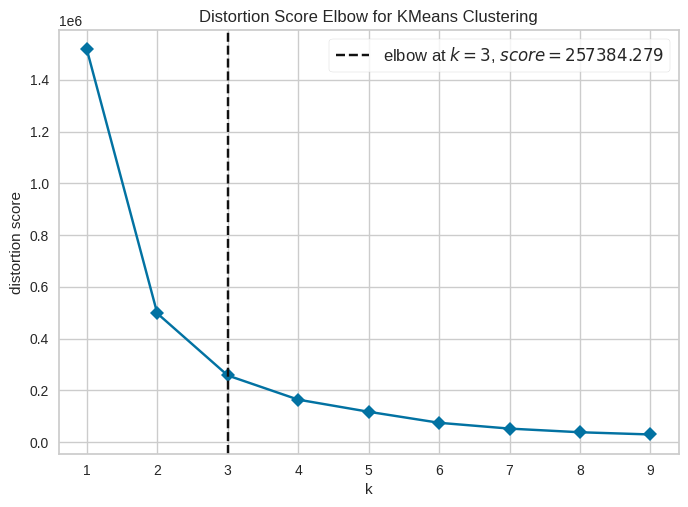

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
vis=KElbowVisualizer(model,k=(1,10),timings=False)
vis.fit(X)
vis.show()

Hence we can confirm that 3 is the best number of clusters

Method 2: Silhouette Score Method

In [48]:
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,max_iter=80)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  print("For Cluster : {}, the silhouette score is: {}".format(i,score))

For Cluster : 2, the silhouette score is: 0.6477981669546936
For Cluster : 3, the silhouette score is: 0.592312670060342
For Cluster : 4, the silhouette score is: 0.5857194010010162
For Cluster : 5, the silhouette score is: 0.5761145071353014
For Cluster : 6, the silhouette score is: 0.5606550059747701
For Cluster : 7, the silhouette score is: 0.5448970961358944
For Cluster : 8, the silhouette score is: 0.5456211529603401
For Cluster : 9, the silhouette score is: 0.5295438650558991


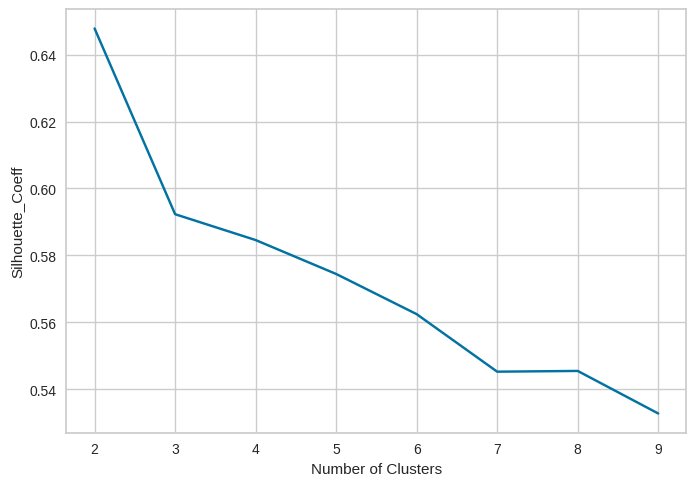

In [49]:
silhouette_coeff = []
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,max_iter=80)
  kmeans.fit(X)
  score=silhouette_score(X,kmeans.labels_)
  silhouette_coeff.append(score)

plt.plot(range(2,10), silhouette_coeff)
plt.xticks(range(2,10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette_Coeff')
plt.show()


Next best value is 3, Hence 3 is optimum number of clusters

PCA for dimensionality reduction

In [55]:
pca = PCA()
x = pca.fit_transform(X)
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(x)
uni=np.unique(label)

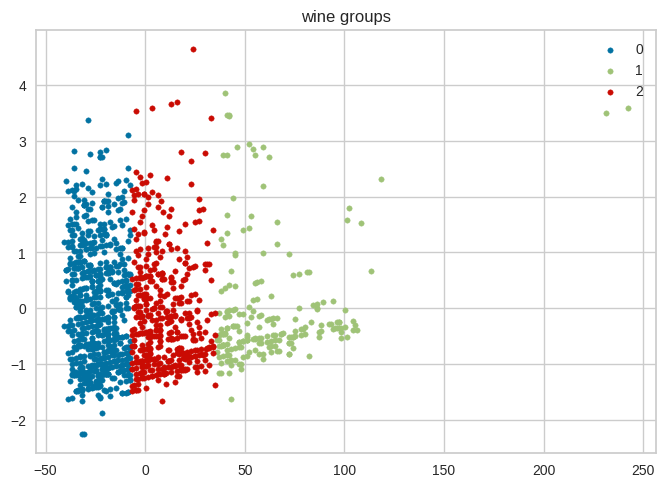

In [56]:
for i in uni:
  plt.scatter(x[label==i,0],x[label==i,1],label=i,s=15)

plt.legend()
plt.title('wine groups')
plt.show()